# Unsupervised Learning

In [29]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv', index_col='playerShort')
df.sample(10)

,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
jack-colback,Jack Colback,Sunderland AFC,England,24.10.1989,175.0,NaN,Center Midfielder,2,1,0,...,NaN,1462,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
john-egan,John Egan,Sunderland AFC (R),England,20.10.1992,185.0,NaN,Center Back,1,0,1,...,NaN,1705,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
cata-diaz,Cata Díaz,Atlético Madrid,Spain,13.03.1979,183.0,72.0,Center Back,1,1,0,...,0.50,38,24,MEX,0.367493,2327.0,0.000174,0.624641,2435.0,0.000868
jeremy-toulalan,Jérémy Toulalan,Málaga CF,Spain,10.09.1983,183.0,77.0,Defensive Midfielder,16,7,5,...,0.25,985,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
graham-dorrans,Graham Dorrans,West Bromwich Albion,England,05.05.1987,175.0,63.0,NaN,1,0,0,...,0.00,1905,28,IRL,0.355498,4078.0,0.000098,0.517225,4238.0,0.000405
aaron-hunt,Aaron Hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,1,1,0,...,0.25,3042,76,SVK,0.429987,139.0,0.002622,0.668966,145.0,0.012878
tim-wiese,Tim Wiese,1899 Hoffenheim,Germany,17.12.1981,193.0,100.0,Goalkeeper,1,0,1,...,0.25,2080,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
gervinho,Gervinho,Arsenal FC,England,27.05.1987,179.0,68.0,Right Winger,6,2,2,...,0.75,1064,48,ITA,0.386174,1761.0,0.000232,0.529815,1895.0,0.001091
romaric,Romaric,Real Zaragoza,Spain,04.06.1983,187.0,88.0,Defensive Midfielder,2,1,0,...,0.75,442,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [31]:
# Remove columns with no rating
df = df.dropna(subset=['rater1', 'rater2'])
df['target'] = (df.rater1 + df.rater2)/2

In [32]:
sdf = df.reset_index().groupby('playerShort')

In [33]:
feature_function_mapper = {
    'height': np.average,
    'weight': np.average,
    'victories': np.sum,
    'ties': np.sum,
    'defeats': np.sum,
    'goals': np.sum,
    'yellowCards': np.sum,
    'yellowReds': np.sum,
    'redCards': np.sum,
    'target': np.average,
    'meanIAT': np.average,
    'nIAT': np.average,
    'seIAT': lambda x: np.sqrt(np.average(np.square(x))),
    'meanExp': np.average,
    'nExp': np.average,
    'seExp': lambda x: np.sqrt(np.average(np.square(x))),
} # meanIAT	nIAT	seIAT	meanExp	nExp	seExp

sdf_agg = sdf.agg(feature_function_mapper)
sdf_agg

,ties,seIAT,victories,meanIAT,target,yellowReds,nExp,redCards,goals,defeats,yellowCards,seExp,weight,meanExp,height,nIAT
playerShort,,,,,,,,,,,,,,,,
aaron-hughes,179,0.003315,247,0.346459,0.125,0,20637.277108,0,9,228,19,0.027536,71.0,0.494575,182.0,19710.156627
aaron-hunt,73,0.000543,141,0.348818,0.125,0,26864.454545,1,62,122,42,0.002506,73.0,0.449220,183.0,26104.292929
aaron-lennon,97,0.001268,200,0.345893,0.250,0,22238.742574,0,31,115,11,0.008914,63.0,0.491482,165.0,21234.861386
aaron-ramsey,42,0.028116,150,0.346821,0.000,0,39719.980769,1,39,68,31,0.104541,76.0,0.514693,178.0,38285.826923
abdelhamid-el-kaoutari,40,0.006309,41,0.331600,0.250,4,2953.837838,2,1,43,8,0.023426,73.0,0.335587,180.0,2832.351351
abdou-traore_2,23,0.012160,41,0.320079,0.750,1,4741.404762,0,3,33,11,0.029404,74.0,0.296562,180.0,4523.666667
abdoulaye-diallo_2,8,0.000353,8,0.341625,0.875,0,2762.500000,0,0,8,0,0.001499,80.0,0.400818,189.0,2646.700000
abdoulaye-keita_2,1,0.000516,0,0.355406,0.875,0,1808.500000,0,0,2,0,0.002139,83.0,0.417225,188.0,1728.000000
abdoulwhaid-sissoko,25,0.000184,34,0.348178,1.000,0,2593.214286,2,3,62,21,0.000771,68.0,0.429630,180.0,2470.196429


In [34]:
features = ['meanExp', 'meanIAT', 'seExp', 'seIAT']
X_unsup = sdf_agg[features]

#X_unsup = sdf_agg.copy()

X_unsup.sample(10)

,meanExp,meanIAT,seExp,seIAT
playerShort,,,,
roberto-firmino,0.335967,0.336628,0.000225,0.000055
damia,0.588297,0.369894,0.001002,0.000229
ryo-miyaichi,0.432967,0.343323,0.000549,0.000120
abelaziz-barrada,0.399237,0.341541,0.048127,0.008812
asmir-begovic,NaN,NaN,NaN,NaN
nicolas-maurice-belay,0.414461,0.342425,0.002938,0.000641
leon-balogun,0.338103,0.337064,0.000781,0.000172
capdevila,0.561221,0.359234,0.004636,0.000879
doni,0.545962,0.367879,0.011609,0.001968


In [36]:
X_unsup = X_unsup.fillna(X_unsup.mean(axis=0))
X_unsup.head()

,meanExp,meanIAT,seExp,seIAT
playerShort,,,,
aaron-hughes,0.494575,0.346459,0.027536,0.003315
aaron-hunt,0.449220,0.348818,0.002506,0.000543
aaron-lennon,0.491482,0.345893,0.008914,0.001268
aaron-ramsey,0.514693,0.346821,0.104541,0.028116
abdelhamid-el-kaoutari,0.335587,0.331600,0.023426,0.006309


In [37]:
km = KMeans(n_clusters=2).fit(X_unsup)

In [38]:
km.predict(X_unsup)

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [39]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_unsup, km.labels_, metric='euclidean'))

Silhouette Coefficient: 0.568


In [40]:
km.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [41]:
km.cluster_centers_

array([[ 0.40992272,  0.34120283,  0.00837805,  0.00185522],
       [ 0.56071704,  0.36164929,  0.00801335,  0.00166134]])

In [42]:
X_unsup['K'] = km.labels_
X_unsup['target']=sdf_agg['target']

In [43]:
X_unsup.head()

,meanExp,meanIAT,seExp,seIAT,K,target
playerShort,,,,,,
aaron-hughes,0.494575,0.346459,0.027536,0.003315,1,0.125
aaron-hunt,0.449220,0.348818,0.002506,0.000543,0,0.125
aaron-lennon,0.491482,0.345893,0.008914,0.001268,1,0.250
aaron-ramsey,0.514693,0.346821,0.104541,0.028116,1,0.000
abdelhamid-el-kaoutari,0.335587,0.331600,0.023426,0.006309,0,0.250


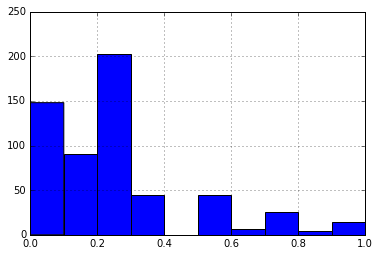

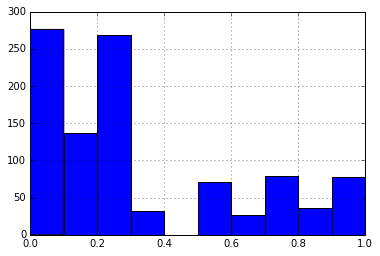

In [44]:
X_unsup[X_unsup.K == 1].target.hist()
plt.show()
X_unsup[X_unsup.K == 0].target.hist()
plt.show()

In [45]:
df1 = X_unsup[X_unsup.target <= 0.5]
df2 = df1[df1.K == 0]
white_in_clust0 = len(df2)
clust0_size = len(X_unsup[X_unsup.K == 0])
white_in_clust0 / clust0_size

0.7810945273631841

In [46]:
df3 = X_unsup[X_unsup.target > 0.5]
df4 = df3[df3.K == 1]
white_in_clust1 = len(df4)
clust1_size = len(X_unsup[X_unsup.K == 1])
white_in_clust1 / clust1_size

0.08448275862068966

# Trying all possible combinations of features

In [47]:
def compute_white_proportions(table):
    df1 = table[table.target <= 0.5]
    df2 = df1[df1.K == 0]
    white_in_clust0 = len(df2)
    clust0_size = len(table[table.K == 0])
    prop0 = white_in_clust0 / clust0_size
    
    df3 = table[table.target > 0.5]
    df4 = df3[df3.K == 1]
    white_in_clust1 = len(df4)
    clust1_size = len(table[table.K == 1])
    prop1 = white_in_clust1 / clust1_size
    
    return np.abs(prop0- prop1)
    

In [48]:
def compute_kmeans(table):
    km = KMeans(n_clusters=2).fit(table)
    predictions = km.predict(table)
    table['K']=km.labels_
    score = silhouette_score(table, predictions, metric='euclidean')
    prop = compute_white_proportions(table)
    
    return score, prop

In [49]:
#found on http://python.jpvweb.com/mesrecettespython/doku.php?id=combinaisons
def combinliste(seq, k):
    p = []
    i, imax = 0, 2**len(seq)-1
    while i<=imax:
        s = []
        j, jmax = 0, len(seq)-1
        while j<=jmax:
            if (i>>j)&1==1:
                s.append(seq[j])
            j += 1
        if len(s)==k:
            p.append(s)
        i += 1 
    return p

In [50]:
def generate_feature_combinations(feats):
    combinations = []
    for i in range(len(feats)):
        combinations.append(combinliste(feats, i))
        
    return combinations

In [51]:
def compute_all_combinations(combinations, table) :
    X_comb = table.copy()
    X_comb.fillna(X_comb.mean(axis=0), inplace=True)
    silhouettes =[]
    clust_scores = []
    features = []
    for i in range(len(combinations)):
        print(i)
        for j in range(len(combinations[i])):
            #print("iteration {} , {}".format(i,j))
            #print(all_combinations[i][j])
            X_temp = X_comb.drop(combinations[i][j], axis=1)
            silhouette, clustering_score = compute_kmeans(X_temp)
            silhouettes.append(silhouette)
            clust_scores.append(clustering_score)
            features.append(combinations[i][j]) 
            
    kmean_stats = pd.DataFrame({'Silhouette': silhouettes,
                        'Clustering_scores' : clust_scores,
                        'Features' :features})
    kmean_stats.set_index('Clustering_scores', inplace=True)
    kmean_stats.sort_index(ascending=False, inplace=True)
    
    return kmean_stats

In [52]:
drop_feats = ['goals','ties','height','victories','weight','defeats']
all_combinations = generate_feature_combinations(drop_feats)

result = compute_all_combinations(all_combinations, sdf_agg)

0
1
2
3
4
5


In [53]:
result.head(10)

,Features,Silhouette
Clustering_scores,,
0.524893,"[ties, victories, weight, defeats]",0.880111
0.524893,"[goals, height, weight]",0.880099
0.524893,"[height, victories, defeats]",0.880108
0.524893,[height],0.880096
0.524893,"[goals, weight, defeats]",0.880102
0.524893,"[goals, ties, height, weight, defeats]",0.880105
0.524893,"[height, victories, weight, defeats]",0.880109
0.524893,"[ties, height]",0.880098
0.524893,"[goals, victories]",0.880108


In [54]:
drop_feats = ['nIAT','meanExp','yellowCards','redCards','seExp','meanIAT','seIAT','nExp','yellowReds']
all_combinations = generate_feature_combinations(drop_feats)

In [55]:
noise_generating_features = result.max()['Features']
noiseless_table = sdf_agg.copy()
noiseless_table.drop(noise_generating_features, inplace=True, axis =1)
noiseless_table

,ties,seIAT,victories,meanIAT,target,yellowReds,nExp,redCards,goals,yellowCards,seExp,meanExp,height,nIAT
playerShort,,,,,,,,,,,,,,
aaron-hughes,179,0.003315,247,0.346459,0.125,0,20637.277108,0,9,19,0.027536,0.494575,182.0,19710.156627
aaron-hunt,73,0.000543,141,0.348818,0.125,0,26864.454545,1,62,42,0.002506,0.449220,183.0,26104.292929
aaron-lennon,97,0.001268,200,0.345893,0.250,0,22238.742574,0,31,11,0.008914,0.491482,165.0,21234.861386
aaron-ramsey,42,0.028116,150,0.346821,0.000,0,39719.980769,1,39,31,0.104541,0.514693,178.0,38285.826923
abdelhamid-el-kaoutari,40,0.006309,41,0.331600,0.250,4,2953.837838,2,1,8,0.023426,0.335587,180.0,2832.351351
abdou-traore_2,23,0.012160,41,0.320079,0.750,1,4741.404762,0,3,11,0.029404,0.296562,180.0,4523.666667
abdoulaye-diallo_2,8,0.000353,8,0.341625,0.875,0,2762.500000,0,0,0,0.001499,0.400818,189.0,2646.700000
abdoulaye-keita_2,1,0.000516,0,0.355406,0.875,0,1808.500000,0,0,0,0.002139,0.417225,188.0,1728.000000
abdoulwhaid-sissoko,25,0.000184,34,0.348178,1.000,0,2593.214286,2,3,21,0.000771,0.429630,180.0,2470.196429


In [56]:
result1 = compute_all_combinations(all_combinations, noiseless_table)

0
1
2
3
4
5
6
7
8


In [57]:
result1.head(10)

,Features,Silhouette
Clustering_scores,,
0.676906,"[nIAT, meanExp, redCards, nExp, yellowReds]",0.520409
0.676906,"[nIAT, redCards, seExp, meanIAT, seIAT, nExp]",0.520297
0.676736,"[nIAT, seExp, meanIAT, nExp]",0.520452
0.676736,"[nIAT, nExp]",0.520452
0.675679,"[nIAT, seExp, meanIAT, nExp, yellowReds]",0.520030
0.675679,"[nIAT, meanExp, redCards, seExp, nExp, yellowR...",0.520126
0.675679,"[nIAT, meanIAT, nExp, yellowReds]",0.520030
0.675679,"[nIAT, seIAT, nExp, yellowReds]",0.520030
0.675679,"[nIAT, meanExp, redCards, seExp, meanIAT, seIA...",0.520015
